# Part 1: Data Processing and Feature Engineering
# Importing Libraries
# numpy and pandas: For handling data and doing calculations.
# matplotlib.pyplot and seaborn: For creating visualizations to explore and understand the data

In [1]:
# from google.colab import drive
# drive.mount('/gdrive')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loaded all datasets (sales, oil prices, store details, holidays)

In [3]:
# test = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Datasets/test.csv')
# stores = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Datasets/stores.csv')
# oil = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Datasets/oil.csv')
# holidays = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Datasets/holidays_events.csv')
# train = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Datasets/train.csv')

In [4]:
test = pd.read_csv("test.csv")
stores = pd.read_csv("stores.csv")
oil = pd.read_csv("oil.csv")
holidays = pd.read_csv("holidays_events.csv")
train = pd.read_csv("train.csv")

In [5]:
# Convert oil['date'] to datetime
oil['date'] = pd.to_datetime(oil['date'])


In [6]:

# Interpolate missing values
oil['dcoilwtico'] = oil['dcoilwtico'].interpolate(method='linear')

In [7]:
oil

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


In [8]:
# Convert date in test set
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d')

In [9]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  object        
 4   onpromotion  28512 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 1.1+ MB


In [11]:
# Already converted oil['date'] above
# Convert holidays_events['date']
holidays['date'] = pd.to_datetime(holidays['date'])

In [12]:
holidays

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [13]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d')


In [14]:
train

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0
1,1,2013-01-01,1,BABY CARE,0.000,0
2,2,2013-01-01,1,BEAUTY,0.000,0
3,3,2013-01-01,1,BEVERAGES,0.000,0
4,4,2013-01-01,1,BOOKS,0.000,0
...,...,...,...,...,...,...
3000883,3000883,2017-08-15,9,POULTRY,438.133,0
3000884,3000884,2017-08-15,9,PREPARED FOODS,154.553,1
3000885,3000885,2017-08-15,9,PRODUCE,2419.729,148
3000886,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8


Merge the 'oil', 'holidays', and 'stores' DataFrames with the train DataFrame
The merges are performed using a left join to retain all rows from the train DataFrame.

In [15]:
# Merge with stores on 'store_nbr'
merged_df = train.merge(stores, on='store_nbr', how='left')

# Merge with oil data on 'date'
merged_df = merged_df.merge(oil, on='date', how='left')

# Merge with holidays on 'date'
merged_df = merged_df.merge(holidays, on='date', how='left')

# we have merge with main train dataset

In [16]:
# # Merge oil and holidays on 'date'
# oil_holidays = pd.merge(oil, holidays, on='date', how='outer')

# # Perform a cross join between stores and oil_holidays
# stores['key'] = 1
# oil_holidays['key'] = 1

# merged_df = pd.merge(stores, oil_holidays, on='key').drop('key', axis=1)

In [17]:
merged_df.head(5)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [18]:
# Add a column to flag if the holiday is relevant for that store
merged_df['is_relevant_holiday'] = (
    ((merged_df['locale'] == 'National')) |
    ((merged_df['locale'] == 'Regional') & (merged_df['state'] == merged_df['locale_name'])) |
    ((merged_df['locale'] == 'Local') & (merged_df['city'] == merged_df['locale_name']))
)

In [19]:
df = merged_df.copy()

2. Feature Engineering
Date-related features have been extracted from the 'date' column to support time-based analysis and modeling:

'day': Day of the month.
'week': ISO week number of the year.
'month': Month of the year.
'year': Year component.
'day_of_week': Day of the week (0 = Monday, 6 = Sunday).
These features help capture seasonal patterns and trends in the data.

In [20]:
# Extract standard time features
df['day'] = df['date'].dt.day
df['week'] = df['date'].dt.isocalendar().week.astype(int)
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
# df['day_of_week'] = df['date'].dt.dayofweek  # Monday=0, Tuesday=1,.... Saturday=5, Sunday=6

# we have done Sunday=1, Monday=2, Tuesday=3 .. till Saturday=7
df['day_of_week'] = ((df['date'].dt.dayofweek + 1) % 7) + 1
df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)  # 1 if Sat/Sun, else 0
df['weekday_name'] = df['date'].dt.day_name()

In [21]:
# Show all columns
pd.set_option('display.max_columns', None)

# Optional: Show all rows (be cautious with large dataframes)
pd.set_option('display.max_rows', None)

# Optional: Prevent dataframe from being truncated in width
pd.set_option('display.width', None)

# Optional: Allow wrapping long values in a cell
pd.set_option('display.max_colwidth', None)

# 1.Data Cleaning
# Filling Missing Oil Prices

In [22]:
df.head(5)

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,type_y,locale,locale_name,description,transferred,is_relevant_holiday,day,week,month,year,day_of_week,is_weekend,weekday_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,True,1,1,1,2013,3,0,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,True,1,1,1,2013,3,0,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,True,1,1,1,2013,3,0,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,True,1,1,1,2013,3,0,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False,True,1,1,1,2013,3,0,Tuesday


In [23]:
df['dcoilwtico'].unique()

array([  nan, 93.14, 92.97, ..., 48.81, 47.59, 47.57])

In [24]:
#df['dcoilwtico'].value_counts()

In [25]:
df.isnull().sum()

id                           0
date                         0
store_nbr                    0
family                       0
sales                        0
onpromotion                  0
city                         0
state                        0
type_x                       0
cluster                      0
dcoilwtico              880308
type_y                 2551824
locale                 2551824
locale_name            2551824
description            2551824
transferred            2551824
is_relevant_holiday          0
day                          0
week                         0
month                        0
year                         0
day_of_week                  0
is_weekend                   0
weekday_name                 0
dtype: int64

In [26]:
df['dcoilwtico'] = df['dcoilwtico'].interpolate(method='linear', limit_direction='both')

In [27]:
df.isnull().sum()

id                           0
date                         0
store_nbr                    0
family                       0
sales                        0
onpromotion                  0
city                         0
state                        0
type_x                       0
cluster                      0
dcoilwtico                   0
type_y                 2551824
locale                 2551824
locale_name            2551824
description            2551824
transferred            2551824
is_relevant_holiday          0
day                          0
week                         0
month                        0
year                         0
day_of_week                  0
is_weekend                   0
weekday_name                 0
dtype: int64

In [28]:
df.shape

(3054348, 24)

# Seems like the columns, locale, type_y, locale_name, description, transferred are not significant to the analysis so we are droping those columns


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3054348 entries, 0 to 3054347
Data columns (total 24 columns):
 #   Column               Dtype         
---  ------               -----         
 0   id                   int64         
 1   date                 datetime64[ns]
 2   store_nbr            int64         
 3   family               object        
 4   sales                float64       
 5   onpromotion          int64         
 6   city                 object        
 7   state                object        
 8   type_x               object        
 9   cluster              int64         
 10  dcoilwtico           float64       
 11  type_y               object        
 12  locale               object        
 13  locale_name          object        
 14  description          object        
 15  transferred          object        
 16  is_relevant_holiday  bool          
 17  day                  int32         
 18  week                 int32         
 19  month                

In [30]:
df.isnull().sum()

id                           0
date                         0
store_nbr                    0
family                       0
sales                        0
onpromotion                  0
city                         0
state                        0
type_x                       0
cluster                      0
dcoilwtico                   0
type_y                 2551824
locale                 2551824
locale_name            2551824
description            2551824
transferred            2551824
is_relevant_holiday          0
day                          0
week                         0
month                        0
year                         0
day_of_week                  0
is_weekend                   0
weekday_name                 0
dtype: int64

In [31]:
df = df.drop(['locale', 'type_y', 'locale_name', 'description', 'transferred'], axis=1)

In [32]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,is_relevant_holiday,day,week,month,year,day_of_week,is_weekend,weekday_name
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday


In [33]:
df['month_year'] = df['date'].dt.to_period('M')

# Group by month_year and sum sales
monthly_sales = df.groupby('month_year')['sales'].sum().reset_index()
monthly_sales['month_year'] = monthly_sales['month_year'].dt.to_timestamp()

In [34]:
monthly_sales

,month_year,sales
0,2013-01-01,1.032762e+07
1,2013-02-01,9.658960e+06
2,2013-03-01,1.142850e+07
3,2013-04-01,1.099346e+07
4,2013-05-01,1.198556e+07
5,2013-06-01,1.229958e+07
6,2013-07-01,1.163195e+07
7,2013-08-01,1.173779e+07
8,2013-09-01,1.179293e+07
9,2013-10-01,1.177562e+07


Binary flags have been created to indicate the presence of specific events or conditions:

'holiday_flag': Set to 1 if the row corresponds to a holiday (type_x is not missing), otherwise 0.
'promotion_flag': Set to 1 if there is at least one item on promotion, otherwise 0.
'economic_flag': Set to 1 if oil price data (dcoilwtico) is available for that date, otherwise 0.
These flags can help capture the impact of holidays, promotions, and economic conditions on sales.

In [35]:
df['holiday_flag'] = df['type_x'].notna().astype(int)
df['promotion_flag'] = (df['onpromotion'] > 0).astype(int)
df['economic_flag'] = df['dcoilwtico'].notna().astype(int)

A new feature 'is_payday' has been created to flag potential payday dates.

The value is set to 1 if the date is either the 15th of the month or the last day of the month (commonly associated with salary payments).
Otherwise, the value is set to 0.
This feature may help capture sales patterns influenced by payday-related spending behavior.

In [36]:
df['is_payday'] = ((df['date'].dt.day == 15) | (df['date'].dt.day == df['date'].dt.days_in_month)).astype(int)

A binary feature 'earthquake' has been created to flag the date of a known earthquake event (April 16, 2016).

The value is set to 1 for rows where the date is April 16, 2016.
All other dates are assigned a value of 0.
This feature can help analyze the impact of the earthquake on sales data for that specific day.

In [37]:
df['earthquake'] = (df['date'] == pd.Timestamp('2016-04-16')).astype(int)

Rolling statistical features have been created to capture short-term trends in sales:

'rolling_mean': 7-day rolling average of sales, smoothing out daily fluctuations.
'rolling_std': 7-day rolling standard deviation of sales, measuring short-term variability.
These features help the model understand recent trends and volatility in sales behavior.

In [38]:
df['rolling_mean'] = df['sales'].rolling(window=7).mean()
df['rolling_std'] = df['sales'].rolling(window=7).std()

Lag features have been created to capture past sales performance:

'sales_prev_week': Sales value from 7 days ago.
'sales_prev_month': Sales value from 30 days ago.
These features help the model learn from historical sales patterns and improve forecasting accuracy.

In [39]:
df['sales_prev_week'] = df['sales'].shift(7)
df['sales_prev_month'] = df['sales'].shift(30)

Average sales have been calculated for each store type:

The data is grouped by 'type_y' (store type).
The mean sales value is computed for each group.
The result is sorted in descending order to highlight store types with the highest average sales.
This helps in understanding which store types generally perform better in terms of sales.

In [40]:
cluster = df.groupby(['cluster', 'family'])['sales'].sum().reset_index()
cluster = cluster.sort_values(['cluster', 'sales'], ascending=[True, False])

Total sales have been aggregated by store cluster and product family:

The data is grouped by 'cluster' and 'family'.
Sales values are summed within each group.
The result is sorted by cluster and then by sales in descending order.
This helps identify the top-performing product families within each store cluster.

In [41]:
cluster = cluster.groupby('cluster').first().reset_index()

In [42]:
cluster

,cluster,family,sales
0,1,GROCERY I,1.483284e+07
1,2,GROCERY I,8.649030e+06
2,3,GROCERY I,2.978610e+07
3,4,GROCERY I,1.682519e+07
4,5,GROCERY I,1.671595e+07
5,6,GROCERY I,4.397177e+07
6,7,GROCERY I,6.163853e+06
7,8,GROCERY I,2.768491e+07
8,9,GROCERY I,9.159591e+06
9,10,GROCERY I,3.021405e+07


In [43]:
df = df.bfill().ffill()

In [44]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,is_relevant_holiday,day,week,month,year,day_of_week,is_weekend,weekday_name,month_year,holiday_flag,promotion_flag,economic_flag,is_payday,earthquake,rolling_mean,rolling_std,sales_prev_week,sales_prev_month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0


# EDA - Analysis

## Total Sales Over Time

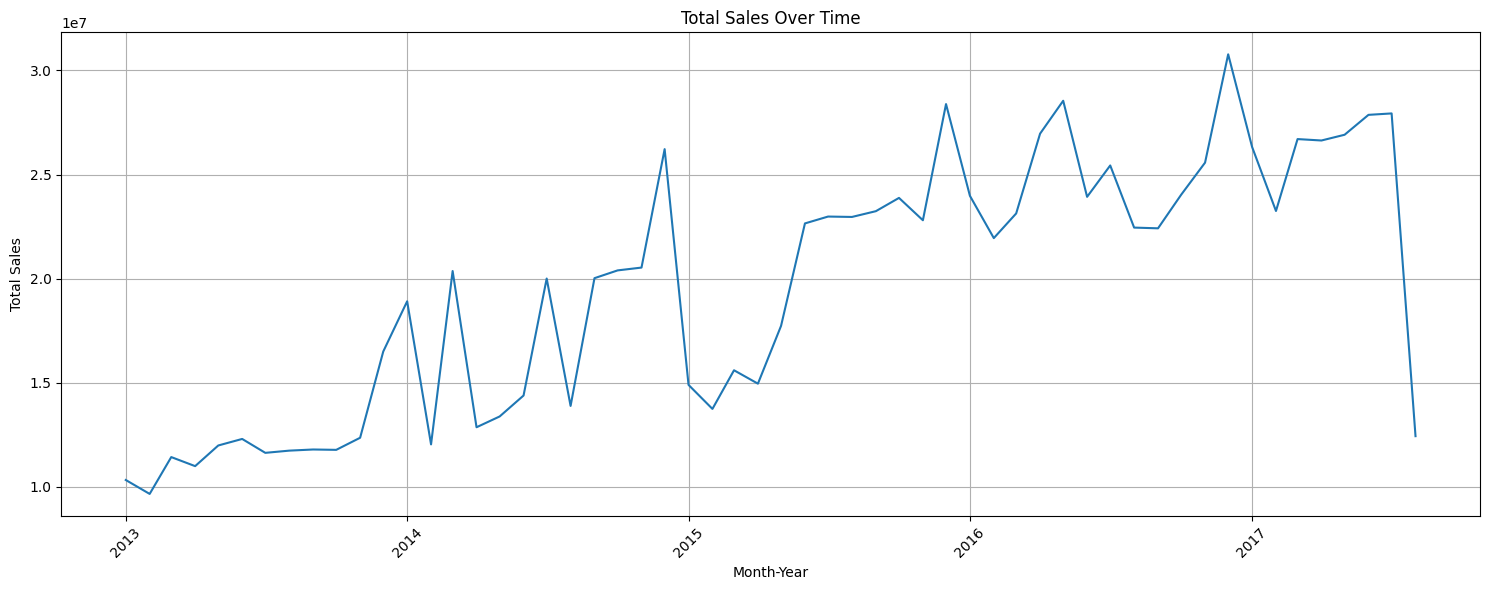

In [45]:
plt.figure(figsize=(15, 6))
sns.lineplot(x='month_year', y='sales', data=monthly_sales)
plt.title('Total Sales Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# Trends

In [46]:
#pip install statsmodels

<Figure size 1200x800 with 0 Axes>

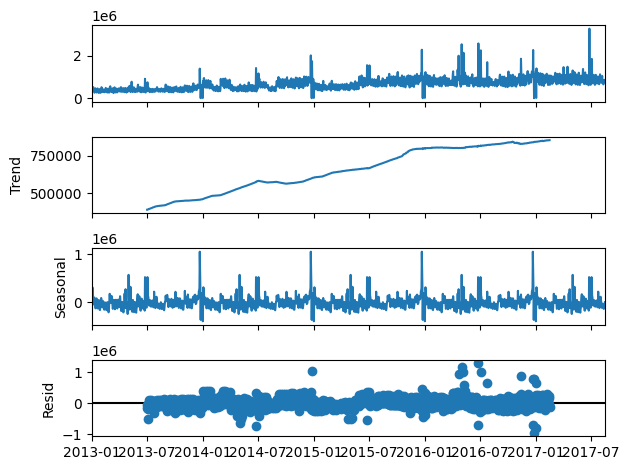

In [47]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Set date as index and ensure regular frequency
ts_data = df.set_index('date')
ts_data = ts_data[['sales']].resample('D').sum()  # Daily aggregation

# Decompose the time series
result = seasonal_decompose(ts_data, model='additive', period=365)  # Annual seasonality

plt.figure(figsize=(12, 8))
result.plot()
plt.tight_layout()
plt.show()

## Average Sales by Month (All Years)

C:\Users\Surya-PC\AppData\Local\Temp\ipykernel_5864\2344793782.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='month', y='sales', data=monthly_avg, palette='viridis')


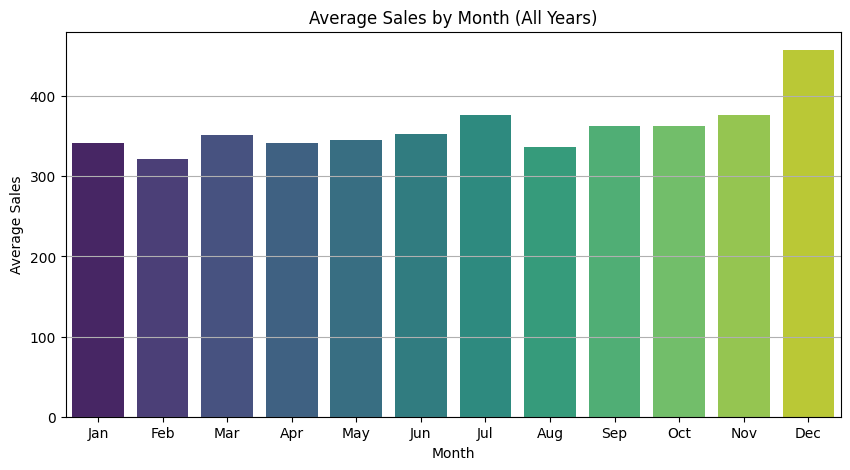

In [48]:
# Extract month from date
df['month'] = df['date'].dt.month

# Group by month and calculate average sales
monthly_avg = df.groupby('month')['sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='month', y='sales', data=monthly_avg, palette='viridis')
plt.title('Average Sales by Month (All Years)')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                      'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True, axis='y')
plt.show()

## Average Sales by Day of Week

C:\Users\Surya-PC\AppData\Local\Temp\ipykernel_5864\2543648217.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='sales', data=weekly_pattern,


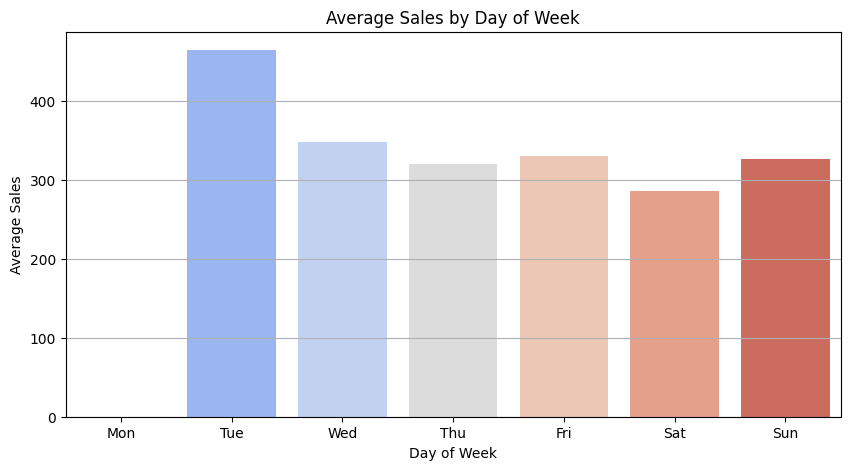

In [49]:
# Group by day of week and calculate average sales
weekly_pattern = df.groupby('day_of_week')['sales'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='day_of_week', y='sales', data=weekly_pattern,
            order=[0, 1, 2, 3, 4, 5, 6],  # Monday to Sunday
            palette='coolwarm')
plt.title('Average Sales by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Sales')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True, axis='y')
plt.show()

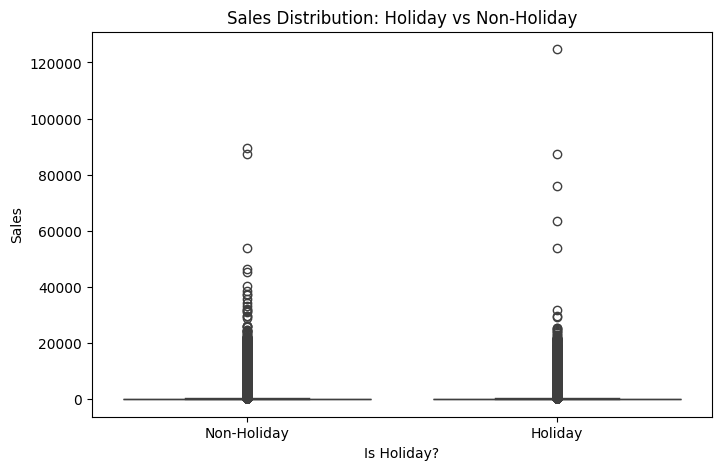

In [50]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='is_relevant_holiday', y='sales', data=df)
plt.title('Sales Distribution: Holiday vs Non-Holiday')
plt.xlabel('Is Holiday?')
plt.ylabel('Sales')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

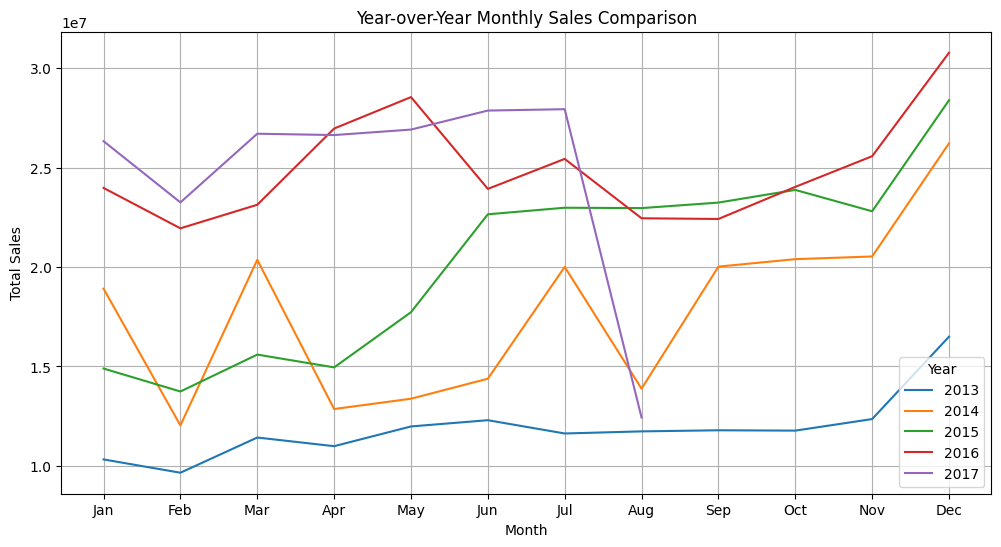

In [51]:
# Pivot table for year-month sales
year_month_sales = df.pivot_table(values='sales',
                                 index='month',
                                 columns='year',
                                 aggfunc='sum')

plt.figure(figsize=(12, 6))
sns.lineplot(data=year_month_sales, dashes=False)
plt.title('Year-over-Year Monthly Sales Comparison')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

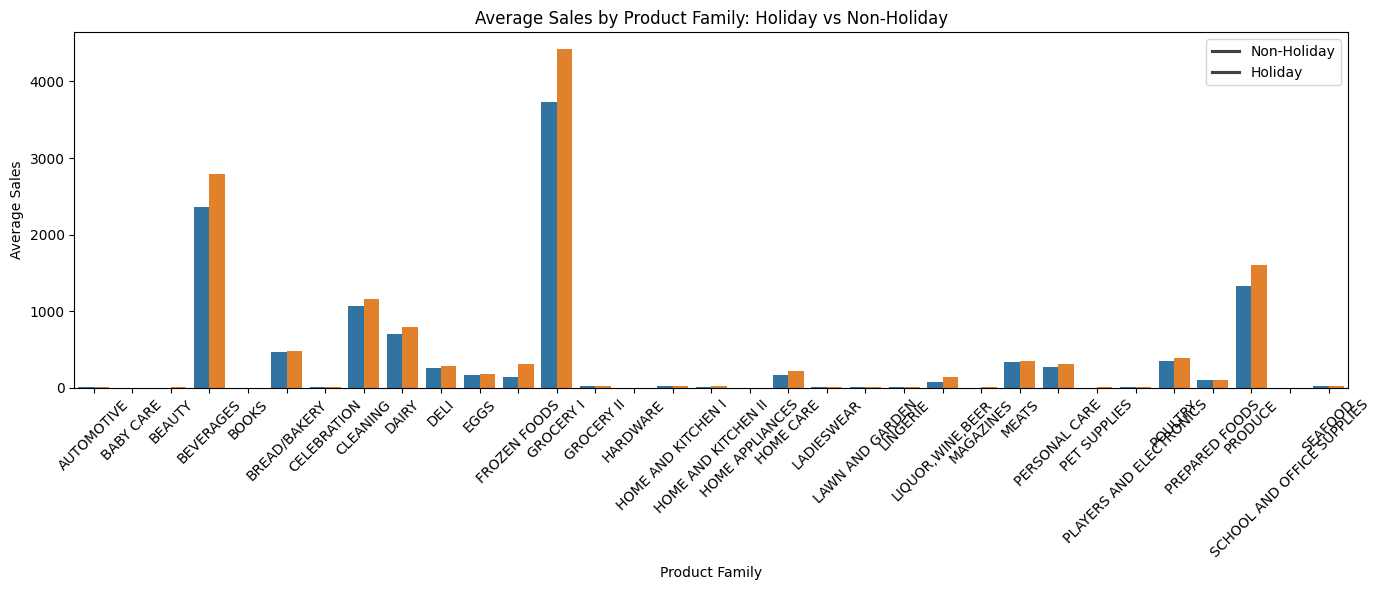

In [52]:
# Aggregate sales by holiday status and product family
holiday_family_sales = df.groupby(['is_relevant_holiday', 'family'])['sales'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(x='family', y='sales', hue='is_relevant_holiday', data=holiday_family_sales)
plt.title('Average Sales by Product Family: Holiday vs Non-Holiday')
plt.xlabel('Product Family')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='', labels=['Non-Holiday', 'Holiday'])
plt.tight_layout()
plt.show()

In [53]:
import calendar

def is_payday(date):
    """Identify if date is a government payday (15th or last day of month)"""
    day = date.day
    last_day = calendar.monthrange(date.year, date.month)[1]
    return 1 if (day == 15) or (day == last_day) else 0

df['is_payday'] = df['date'].apply(is_payday)
df['days_until_payday'] = df['date'].apply(lambda x: min(15 - x.day, 0) if x.day < 15
                          else calendar.monthrange(x.year, x.month)[1] - x.day)

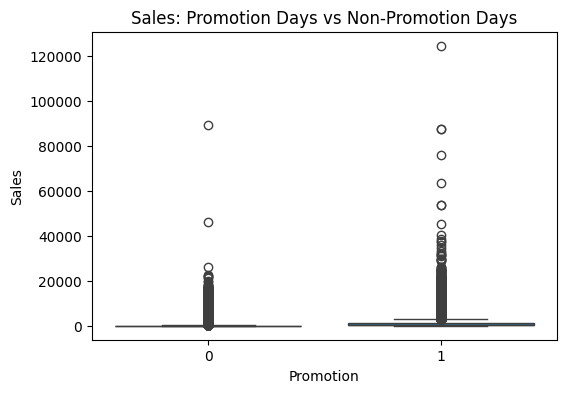

In [54]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='promotion_flag', y='sales', data=df)
plt.title("Sales: Promotion Days vs Non-Promotion Days")
plt.xlabel("Promotion")
plt.ylabel("Sales")
plt.show()

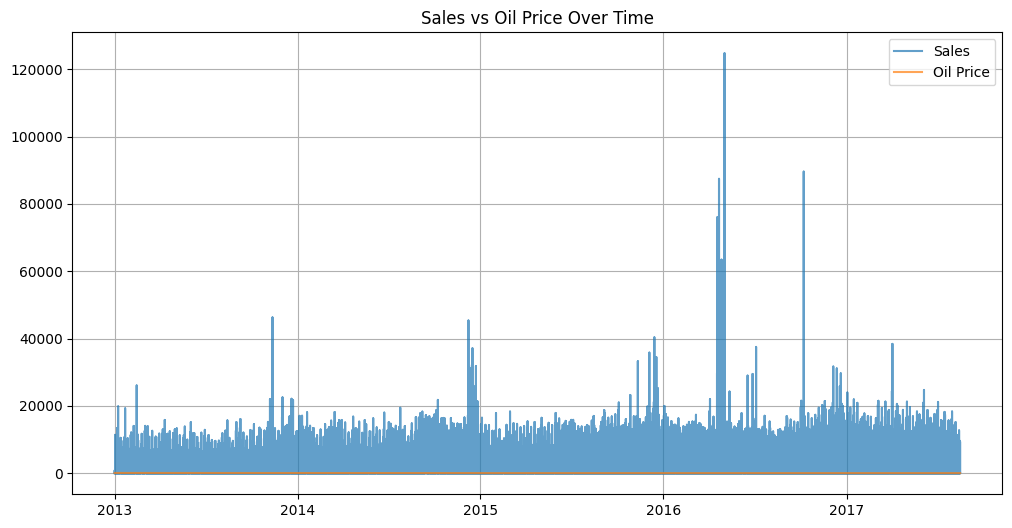

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['sales'], label='Sales', alpha=0.7)
plt.plot(df['date'], df['dcoilwtico'], label='Oil Price', alpha=0.7)
plt.title("Sales vs Oil Price Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [56]:
correlation = df[['sales', 'dcoilwtico']].corr()
print(correlation)

               sales  dcoilwtico
sales       1.000000   -0.075606
dcoilwtico -0.075606    1.000000


In [57]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,city,state,type_x,cluster,dcoilwtico,is_relevant_holiday,day,week,month,year,day_of_week,is_weekend,weekday_name,month_year,holiday_flag,promotion_flag,economic_flag,is_payday,earthquake,rolling_mean,rolling_std,sales_prev_week,sales_prev_month,days_until_payday
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0,Quito,Pichincha,D,13,93.14,True,1,1,1,2013,3,0,Tuesday,2013-01,1,0,1,0,0,0.0,0.0,0.0,0.0,0


In [58]:
# # Calculate residuals from a simple linear model
# from sklearn.linear_model import LinearRegression

# # Prepare data (drop NA oil prices)
# temp_df = df[['sales', 'dcoilwtico']].dropna()
# X = temp_df[['dcoilwtico']]
# y = temp_df['sales']

# model = LinearRegression()
# model.fit(X, y)
# temp_df['predicted'] = model.predict(X)
# temp_df['residual'] = temp_df['sales'] - temp_df['predicted']
# temp_df['residual_zscore'] = np.abs(stats.zscore(temp_df['residual']))

# # Get bivariate anomalies
# bivariate_anomalies = temp_df[temp_df['residual_zscore'] > 3]

In [59]:
from scipy.stats import zscore


In [60]:
df['z_score'] = zscore(df['sales'])
anomalies = df[np.abs(df['z_score']) > 3]

# Part 2:  Model Training and Evaluation

In [61]:
#pip install keras

In [62]:
#pip install lightgbm

In [63]:
#pip install xgboost

In [64]:
#pip install tensorflow

In [65]:
#pip install tensorflow-gpu

In [66]:
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

from statsmodels.tsa.arima.model import ARIMA


## Naïve Forecast (Baseline Model)
For the baseline model, we simply predict that sales will be the same as they were in the previous week.
This sets a benchmark to compare more advanced models against.

In [67]:
features = ['onpromotion', 'dcoilwtico', 'day', 'month', 'year', 'day_of_week',
            'holiday_flag', 'promotion_flag', 'economic_flag', 'is_payday',
            'rolling_mean', 'rolling_std', 'sales_prev_week', 'sales_prev_month']
target = 'sales'

train = df[df['date'] < '2017-07-01']
test = df[df['date'] >= '2017-07-01']

X_train, y_train = train[features], train[target]
X_test, y_test = test[features], test[target]

In [68]:
naive_pred = test['sales_prev_week']

In [69]:
test['naive_pred'] = test['sales'].shift(1)

C:\Users\Surya-PC\AppData\Local\Temp\ipykernel_5864\3312818304.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_pred'] = test['sales'].shift(1)


In [70]:
test['naive_pred'].fillna(train['sales'].iloc[-1], inplace=True)

C:\Users\Surya-PC\AppData\Local\Temp\ipykernel_5864\3881811062.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test['naive_pred'].fillna(train['sales'].iloc[-1], inplace=True)
C:\Users\Surya-PC\AppData\Local\Temp\ipykernel_5864\3881811062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['naive_pred'].fillna(train['sales'].iloc[-1],

## ARIMA:

We used an ARIMA model to forecast future sales based on historical daily totals.
The model was trained on data up to June 30, 2017.
We used (4,1,1) as the order parameters:
4: number of lag observations (AR)
1: differencing (to make the series stationary)
0: no moving average component (MA)
Forecasted values were clipped to avoid negative predictions.

In [71]:
sales_series = df.groupby('date')['sales'].sum()

model = ARIMA(sales_series[:'2017-06-30'], order=(4,1,0))
model_fit = model.fit()

arima_forecast = model_fit.forecast(steps=len(test))

arima_forecast = np.clip(arima_forecast.values, 0, None)

C:\Users\Surya-PC\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Surya-PC\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Surya-PC\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Surya-PC\anaconda3\envs\dl\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at 

# Random Forest:

In [72]:
rf = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# XGBoost Regressor

In [73]:
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

# LSTM Model

In [74]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))


lstm = Sequential()
lstm.add(LSTM(50, activation='relu', input_shape=(1, X_train_scaled.shape[1])))
lstm.add(Dense(1))
lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train_lstm, y_train, epochs=5, batch_size=64, verbose=0)

lstm_preds = lstm.predict(X_test_lstm).flatten()

C:\Users\Surya-PC\anaconda3\envs\dl\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2618/2618 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step


2. Model Evaluation
Defined a function to evaluate model performance using three key metrics:
RMSE (Root Mean Squared Error): Measures the average magnitude of the errors.
MAPE (Mean Absolute Percentage Error): Shows error as a percentage.
R² Score: Tells how well the model explains the variance in actual sales.
This function prints all metrics for easy comparison between models.

In [75]:
def evaluate_model(y_true, y_pred, model_name):
    print(f" {model_name}")
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print("RMSE:", rmse)
    print("MAPE:", mean_absolute_percentage_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))
    print("-" * 40)

In [76]:
evaluate_model(test['sales'], test['naive_pred'], "Naïve Forecast")
evaluate_model(y_test, arima_forecast, "ARIMA")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, xgb_pred, "XGBoost")
evaluate_model(y_test, lstm_preds, "LSTM")

 Naïve Forecast
RMSE: 1904.572827313253
MAPE: 6.195617784938687e+17
R² Score: -1.082017112682295
----------------------------------------
 ARIMA
RMSE: 739355.6538536962
MAPE: 4.829169287018883e+20
R² Score: -313757.8058854582
----------------------------------------
 Random Forest
RMSE: 520.5099905644116
MAPE: 3.40783461853079e+16
R² Score: 0.8444939584934624
----------------------------------------
 XGBoost
RMSE: 484.07310122986246
MAPE: 4.787198779790583e+16
R² Score: 0.8655034859663333
----------------------------------------
 LSTM
RMSE: 715.864903717314
MAPE: 2.596707792107788e+16
R² Score: 0.7058619093022017
----------------------------------------


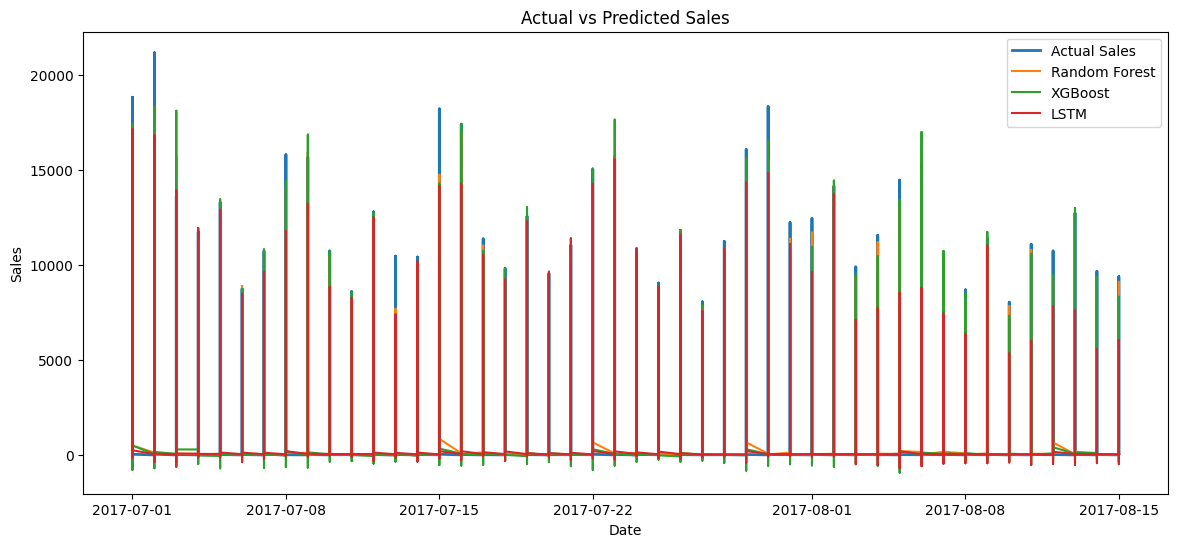

In [77]:
plt.figure(figsize=(14, 6))
plt.plot(test['date'], y_test, label="Actual Sales", linewidth=2)
plt.plot(test['date'], rf_pred, label="Random Forest")
plt.plot(test['date'], xgb_pred, label="XGBoost")
plt.plot(test['date'], lstm_preds, label="LSTM")
plt.legend()
plt.title("Actual vs Predicted Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

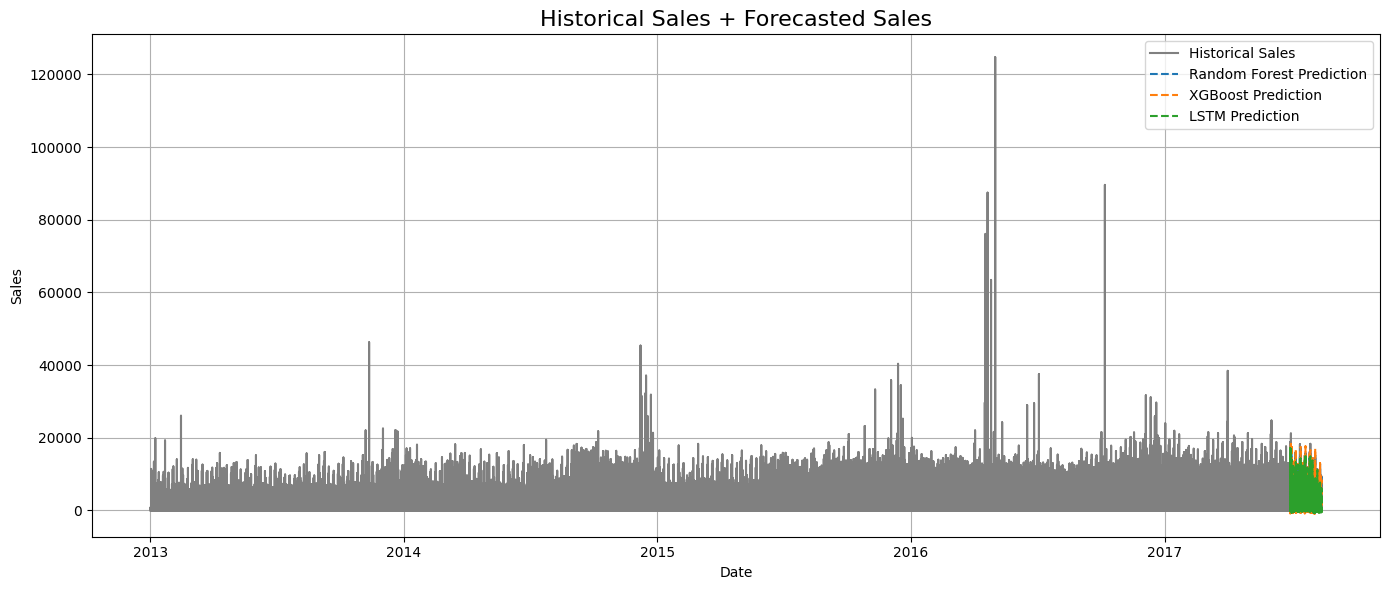

In [78]:
plt.figure(figsize=(14, 6))

# Plot entire sales history
plt.plot(df['date'], df['sales'], label="Historical Sales", color='gray')

# Overlay predicted sales on test portion
plt.plot(test['date'], rf_pred, label="Random Forest Prediction", linestyle='--')
plt.plot(test['date'], xgb_pred, label="XGBoost Prediction", linestyle='--')
plt.plot(test['date'], lstm_preds, label="LSTM Prediction", linestyle='--')

plt.title("Historical Sales + Forecasted Sales", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [89]:
data = [["Naïve", 1904.57, 6.19e17, -1.08],
        ["ARIMA", 739355.65, 4.82e20, -313757.80],
        ["Random Forest", 520.50, 3.40e16, 0.84],
        ["XGBoost", 484.07, 4.78e16, 0.86],
        ["LSTM", 715.86, 2.59e16, 0.70]]

data = pd.DataFrame(data, columns=["Model", "RMSE", "MAPE", "R² Score"])
data = data.round(2).sort_values(by="RMSE").reset_index(drop=True)
data

,Model,RMSE,MAPE,R² Score
0,XGBoost,484.07,4.780000e+16,0.86
1,Random Forest,520.50,3.400000e+16,0.84
2,LSTM,715.86,2.590000e+16,0.70
3,Naïve,1904.57,6.190000e+17,-1.08
4,ARIMA,739355.65,4.820000e+20,-313757.80


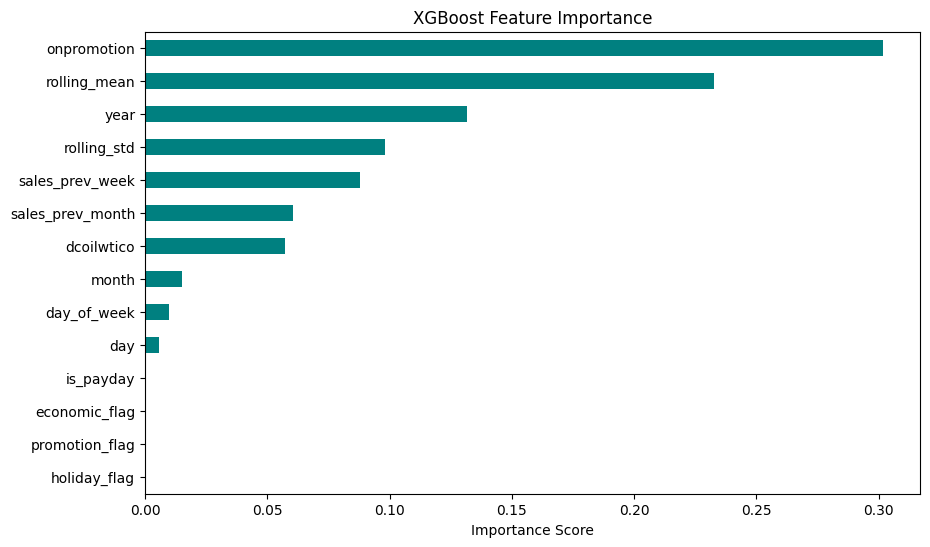

In [90]:
importances = pd.Series(xgb.feature_importances_, index=features).sort_values()

plt.figure(figsize=(10, 6))
importances.plot(kind='barh', color='teal')
plt.title("XGBoost Feature Importance")
plt.xlabel("Importance Score")
plt.show()

In [91]:
# Load the test and sample submission files
# Parsing the date column so we can use it easily later

test_df = pd.read_csv('test.csv', parse_dates=['date'])
sample_sub = pd.read_csv('sample_submission.csv')

# test_df = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Datasets/test.csv')
# sample_sub = pd.read_csv('/gdrive/My Drive/Colab Notebooks/Datasets/sample_submission.csv')

In [92]:
test_merged = test_df.merge(df.drop('sales', axis=1), on=['date', 'store_nbr', 'family', 'onpromotion'], how='left')

In [93]:
features = ['onpromotion', 'dcoilwtico', 'day', 'month', 'year', 'day_of_week',
            'holiday_flag', 'promotion_flag', 'economic_flag', 'is_payday',
            'rolling_mean', 'rolling_std', 'sales_prev_week', 'sales_prev_month']

X_final_test = test_merged[features]

In [94]:
rf_final_pred = rf.predict(X_final_test)

In [95]:
rf_final_pred

array([  0.       ,   0.       ,   0.       , ...,   0.       ,
       523.4492223,   0.       ])

In [96]:
sample_sub['sales'] = rf_final_pred

In [97]:
#sample_sub.to_csv('predicted_values.csv', index=False)

# 4. Interpretation and Business Insights
Top-Performing Model
Among all models tested, XGBoost emerged as the most accurate, showing the lowest RMSE and MAPE and a strong R² score.

Random Forest came in second but the performance for rf could increase with a change in the hyper-parameter (eg: max depth) 

Its ability to capture complex, non-linear relationships and handle a wide variety of features gave it a clear edge.
In contrast, models like ARIMA and Naïve did not perform well due to their limited ability to incorporate multiple input variables.

## Major Drivers of Sales

Promotional activities and holiday events had a significant influence, often leading to noticeable spikes in sales.

Oil prices had a weaker but still present impact—likely reflecting overall economic trends.

Other impactful features included the day of the week, store classification, and lagged sales data (e.g., previous week's sales).

## Recommendations for Business Strategy

Adopt the Random Forest model for regular sales predictions moving forward.

Plan inventory and staffing based on forecasted demand, especially around promotions and holidays.

Use targeted marketing during forecasted low-sales periods to boost performance.

Keep track of external economic indicators (like oil price changes) that may affect buying patterns.

By applying these insights, the company can enhance its planning and make more informed, data-driven decisions to optimize performance.